## Import Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [2]:
df=pd.read_csv("customer_churn_data.csv")

In [41]:
df.head()

,CustomerID,Age,Gender,Location,Occupation,Income Bracket,Credit Score,Onboarding Date,Channel,App Logins,...,Repayment Misses,Overdraft Events,Failed Payments,Current Plan,Payment Mode,Tickets Raised,Resolution Time (hrs),Sentiment Score,Survey Feedback,Churned
0,CUST00000,49,Other,West,Retired,Low,792,28-07-2019,Branch,21.0,...,1,1,0,Silver,Auto,4.0,26.993946,0.570978,Bad,0
1,CUST00001,53,Male,West,Salaried,Low,356,28-03-2011,Online,4.0,...,0,9,0,Platinum,Auto,0.0,101.537031,0.832714,Good,1
2,CUST00002,67,Female,North,Self-employed,Medium,441,21-11-2017,Branch,NaN,...,0,2,0,Basic,Manual,2.0,29.379271,0.442001,Bad,0
3,CUST00003,54,Male,South,Self-employed,Medium,708,18-03-2017,Online,11.0,...,0,3,0,Gold,Auto,1.0,167.618638,0.264915,Neutral,0
4,CUST00004,65,Male,South,Student,Medium,377,22-04-2011,Online,10.0,...,1,1,0,Gold,Auto,0.0,5.694075,0.253205,Good,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CustomerID             10000 non-null  object 
 1   Age                    10000 non-null  int64  
 2   Gender                 10000 non-null  object 
 3   Location               10000 non-null  object 
 4   Occupation             9500 non-null   object 
 5   Income Bracket         10000 non-null  object 
 6   Credit Score           10000 non-null  int64  
 7   Onboarding Date        10000 non-null  object 
 8   Channel                10000 non-null  object 
 9   App Logins             9500 non-null   float64
 10  Web Logins             10000 non-null  int64  
 11  Device Type            10000 non-null  object 
 12  Loans Accessed         10000 non-null  int64  
 13  Savings Accessed       10000 non-null  int64  
 14  Monthly Avg Balance    9500 non-null   float64
 15  Loa

## Exploratory Data Analysis

In [43]:
print('==========Dataset Shape==========')
shape=df.shape
print(shape)
print('==========Column names:==========')
column_names=df.columns.tolist()
print(column_names)
print('==========Data types:==========')
data_types=df.dtypes
print(data_types)

==========Dataset Shape==========
(10000, 26)
==========Column names:==========
['CustomerID', 'Age', 'Gender', 'Location', 'Occupation', 'Income Bracket', 'Credit Score', 'Onboarding Date', 'Channel', 'App Logins', 'Web Logins', 'Device Type', 'Loans Accessed', 'Savings Accessed', 'Monthly Avg Balance', 'Loans Taken', 'Repayment Misses', 'Overdraft Events', 'Failed Payments', 'Current Plan', 'Payment Mode', 'Tickets Raised', 'Resolution Time (hrs)', 'Sentiment Score', 'Survey Feedback', 'Churned']
==========Data types:==========
CustomerID                object
Age                        int64
Gender                    object
Location                  object
Occupation                object
Income Bracket            object
Credit Score               int64
Onboarding Date           object
Channel                   object
App Logins               float64
Web Logins                 int64
Device Type               object
Loans Accessed             int64
Savings Accessed           int64
Mo

In [44]:
pd.DataFrame(describe)

,Age,Credit Score,App Logins,Web Logins,Loans Accessed,Savings Accessed,Monthly Avg Balance,Loans Taken,Repayment Misses,Overdraft Events,Failed Payments,Tickets Raised,Resolution Time (hrs),Sentiment Score,Churned
count,10000.000000,10000.000000,9500.000000,10000.000000,10000.000000,10000.0,9500.000000,10000.000000,10000.000000,10000.000000,10000.000000,9500.000000,10000.000000,10000.000000,10000.000000
mean,43.458100,572.602400,11.405263,7.627000,1.195900,1.0,48104.103042,1.228100,0.599500,2.169500,0.201600,2.191474,48.253749,0.459538,0.196200
std,15.103068,157.368693,3.530293,2.876925,1.153801,0.0,15571.599715,1.178647,0.646484,1.525648,0.401215,1.529467,48.044878,0.309893,0.397141
min,18.000000,300.000000,1.000000,0.000000,0.000000,1.0,-5339.744333,0.000000,0.000000,0.000000,0.000000,0.000000,0.005429,-0.700708,0.000000
25%,31.000000,437.750000,9.000000,6.000000,0.000000,1.0,37479.523700,0.000000,0.000000,1.000000,0.000000,1.000000,14.223150,0.252832,0.000000
50%,43.000000,573.500000,11.000000,7.000000,1.000000,1.0,48105.890075,1.000000,1.000000,2.000000,0.000000,2.000000,33.578419,0.461850,0.000000
75%,57.000000,707.000000,14.000000,9.000000,2.000000,1.0,58809.955917,2.000000,1.000000,3.000000,0.000000,3.000000,66.555606,0.667295,0.000000
max,69.000000,849.000000,28.000000,21.000000,9.000000,1.0,104119.488300,8.000000,2.000000,10.000000,1.000000,10.000000,467.560813,1.675456,1.000000


## Target variance analysis
- Not churned    8038
- Churned    1962
Data is imbalenced

In [6]:
df['Churned'].value_counts()

Churned
0    8038
1    1962
Name: count, dtype: int64

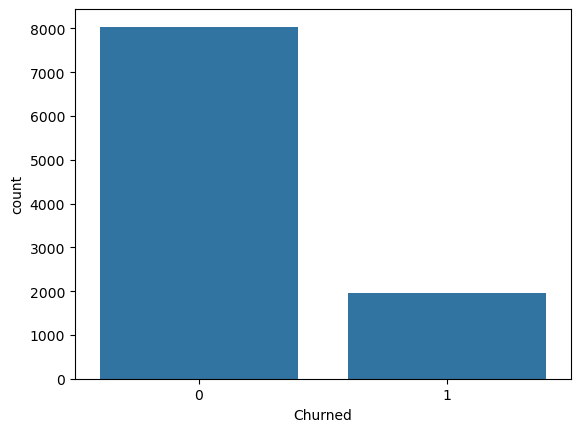

In [7]:
sns.countplot(x='Churned',data=df)
plt.show()

## Preprocessing
- Handle missing values,
- convert data types,
- clean the dataset.

In [8]:
cleaned_data=df.copy()
missing_value=cleaned_data.isnull().sum()
missing_value

CustomerID                 0
Age                        0
Gender                     0
Location                   0
Occupation               500
Income Bracket             0
Credit Score               0
Onboarding Date            0
Channel                    0
App Logins               500
Web Logins                 0
Device Type                0
Loans Accessed             0
Savings Accessed           0
Monthly Avg Balance      500
Loans Taken                0
Repayment Misses           0
Overdraft Events           0
Failed Payments            0
Current Plan               0
Payment Mode               0
Tickets Raised           500
Resolution Time (hrs)      0
Sentiment Score            0
Survey Feedback            0
Churned                    0
dtype: int64

In [9]:
# drop rows which has null value in occupation
cleaned_data=cleaned_data.dropna(subset=['Occupation'])
cleaned_data['App Logins'].fillna(cleaned_data['App Logins'].mean(),inplace=True)
cleaned_data['Monthly Avg Balance'].fillna(cleaned_data['Monthly Avg Balance'].mean(),inplace=True)
cleaned_data['Tickets Raised'].fillna(cleaned_data['Tickets Raised'].mode()[0],inplace=True)

C:\Users\tanma\AppData\Local\Temp\ipykernel_20784\2753226894.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cleaned_data['App Logins'].fillna(cleaned_data['App Logins'].mean(),inplace=True)
C:\Users\tanma\AppData\Local\Temp\ipykernel_20784\2753226894.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

## After Handling missing value

In [10]:
missing_value=cleaned_data.isnull().sum()
missing_value

CustomerID               0
Age                      0
Gender                   0
Location                 0
Occupation               0
Income Bracket           0
Credit Score             0
Onboarding Date          0
Channel                  0
App Logins               0
Web Logins               0
Device Type              0
Loans Accessed           0
Savings Accessed         0
Monthly Avg Balance      0
Loans Taken              0
Repayment Misses         0
Overdraft Events         0
Failed Payments          0
Current Plan             0
Payment Mode             0
Tickets Raised           0
Resolution Time (hrs)    0
Sentiment Score          0
Survey Feedback          0
Churned                  0
dtype: int64

In [11]:
# #convert data types of Onboarding Date
cleaned_data['Onboarding Date']=pd.to_datetime(cleaned_data['Onboarding Date'])

C:\Users\tanma\AppData\Local\Temp\ipykernel_20784\1151789530.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cleaned_data['Onboarding Date']=pd.to_datetime(cleaned_data['Onboarding Date'])


In [12]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9500 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   CustomerID             9500 non-null   object        
 1   Age                    9500 non-null   int64         
 2   Gender                 9500 non-null   object        
 3   Location               9500 non-null   object        
 4   Occupation             9500 non-null   object        
 5   Income Bracket         9500 non-null   object        
 6   Credit Score           9500 non-null   int64         
 7   Onboarding Date        9500 non-null   datetime64[ns]
 8   Channel                9500 non-null   object        
 9   App Logins             9500 non-null   float64       
 10  Web Logins             9500 non-null   int64         
 11  Device Type            9500 non-null   object        
 12  Loans Accessed         9500 non-null   int64         
 13  Savings 

## Feature Engineering
- create new feature column
- drop column
- create group
  - categorical column
  -  numerical column

In [13]:
fe= cleaned_data.copy()
fe['Onboarding Year']=fe['Onboarding Date'].dt.year
fe['Onboarding Month']=fe['Onboarding Date'].dt.month

# Customer Customer tenuer in years
fe['Customer Tenuer Year']=2025-fe['Onboarding Year']

#Total logins App Logins plus Web Logins
fe['Total Logins']=fe['App Logins']+fe['Web Logins']

fe['Support Intensity']=fe['Tickets Raised']/fe['Resolution Time (hrs)']

In [14]:
fe = fe.drop(columns='CustomerID')
fe=fe.drop(columns='Onboarding Date')
fe=fe.drop(columns='App Logins')
fe=fe.drop(columns='Web Logins')

In [15]:
fe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9500 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    9500 non-null   int64  
 1   Gender                 9500 non-null   object 
 2   Location               9500 non-null   object 
 3   Occupation             9500 non-null   object 
 4   Income Bracket         9500 non-null   object 
 5   Credit Score           9500 non-null   int64  
 6   Channel                9500 non-null   object 
 7   Device Type            9500 non-null   object 
 8   Loans Accessed         9500 non-null   int64  
 9   Savings Accessed       9500 non-null   int64  
 10  Monthly Avg Balance    9500 non-null   float64
 11  Loans Taken            9500 non-null   int64  
 12  Repayment Misses       9500 non-null   int64  
 13  Overdraft Events       9500 non-null   int64  
 14  Failed Payments        9500 non-null   int64  
 15  Current P

In [16]:
#numerical column
num_cols = fe.select_dtypes(include=['float64', 'int64']).columns

#Categorical column
cat_cols = fe.select_dtypes(include=['object']).columns

In [17]:
num_cols

Index(['Age', 'Credit Score', 'Loans Accessed', 'Savings Accessed',
       'Monthly Avg Balance', 'Loans Taken', 'Repayment Misses',
       'Overdraft Events', 'Failed Payments', 'Tickets Raised',
       'Resolution Time (hrs)', 'Sentiment Score', 'Churned', 'Total Logins',
       'Support Intensity'],
      dtype='object')

In [18]:
cat_cols

Index(['Gender', 'Location', 'Occupation', 'Income Bracket', 'Channel',
       'Device Type', 'Current Plan', 'Payment Mode', 'Survey Feedback'],
      dtype='object')

In [19]:
fe.head()

,Age,Gender,Location,Occupation,Income Bracket,Credit Score,Channel,Device Type,Loans Accessed,Savings Accessed,...,Tickets Raised,Resolution Time (hrs),Sentiment Score,Survey Feedback,Churned,Onboarding Year,Onboarding Month,Customer Tenuer Year,Total Logins,Support Intensity
0,49,Other,West,Retired,Low,792,Branch,iOS,0,1,...,4.0,26.993946,0.570978,Bad,0,2019,7,6,32.000000,0.148181
1,53,Male,West,Salaried,Low,356,Online,Web,3,1,...,0.0,101.537031,0.832714,Good,1,2011,3,14,7.000000,0.000000
2,67,Female,North,Self-employed,Medium,441,Branch,Web,1,1,...,2.0,29.379271,0.442001,Bad,0,2017,11,8,20.400753,0.068075
3,54,Male,South,Self-employed,Medium,708,Online,Android,0,1,...,1.0,167.618638,0.264915,Neutral,0,2017,3,8,17.000000,0.005966
4,65,Male,South,Student,Medium,377,Online,iOS,0,1,...,0.0,5.694075,0.253205,Good,0,2011,4,14,22.000000,0.000000


## Lable Encoding

In [20]:
from sklearn.preprocessing import LabelEncoder
for col in cat_cols:
    le=LabelEncoder()
    fe[col]=le.fit_transform(fe[col])
    print(f"\n{col} Mapping:")
    print(pd.DataFrame({
        'Category': le.classes_,
        'Encoded Value': range(len(le.classes_))
    }))


Gender Mapping:
  Category  Encoded Value
0   Female              0
1     Male              1
2    Other              2

Location Mapping:
  Category  Encoded Value
0     East              0
1    North              1
2    South              2
3     West              3

Occupation Mapping:
        Category  Encoded Value
0        Retired              0
1       Salaried              1
2  Self-employed              2
3        Student              3

Income Bracket Mapping:
  Category  Encoded Value
0     High              0
1      Low              1
2   Medium              2

Channel Mapping:
  Category  Encoded Value
0    Agent              0
1   Branch              1
2   Online              2

Device Type Mapping:
  Category  Encoded Value
0  Android              0
1      Web              1
2      iOS              2

Current Plan Mapping:
   Category  Encoded Value
0     Basic              0
1      Gold              1
2  Platinum              2
3    Silver              3

Payment Mode 

In [21]:
fe.head()

,Age,Gender,Location,Occupation,Income Bracket,Credit Score,Channel,Device Type,Loans Accessed,Savings Accessed,...,Tickets Raised,Resolution Time (hrs),Sentiment Score,Survey Feedback,Churned,Onboarding Year,Onboarding Month,Customer Tenuer Year,Total Logins,Support Intensity
0,49,2,3,0,1,792,1,2,0,1,...,4.0,26.993946,0.570978,0,0,2019,7,6,32.000000,0.148181
1,53,1,3,1,1,356,2,1,3,1,...,0.0,101.537031,0.832714,1,1,2011,3,14,7.000000,0.000000
2,67,0,1,2,2,441,1,1,1,1,...,2.0,29.379271,0.442001,0,0,2017,11,8,20.400753,0.068075
3,54,1,2,2,2,708,2,0,0,1,...,1.0,167.618638,0.264915,2,0,2017,3,8,17.000000,0.005966
4,65,1,2,3,2,377,2,2,0,1,...,0.0,5.694075,0.253205,1,0,2011,4,14,22.000000,0.000000


In [22]:
features=fe.drop(columns=['Churned'])
target=fe['Churned']
features

,Age,Gender,Location,Occupation,Income Bracket,Credit Score,Channel,Device Type,Loans Accessed,Savings Accessed,...,Payment Mode,Tickets Raised,Resolution Time (hrs),Sentiment Score,Survey Feedback,Onboarding Year,Onboarding Month,Customer Tenuer Year,Total Logins,Support Intensity
0,49,2,3,0,1,792,1,2,0,1,...,0,4.0,26.993946,0.570978,0,2019,7,6,32.000000,0.148181
1,53,1,3,1,1,356,2,1,3,1,...,0,0.0,101.537031,0.832714,1,2011,3,14,7.000000,0.000000
2,67,0,1,2,2,441,1,1,1,1,...,1,2.0,29.379271,0.442001,0,2017,11,8,20.400753,0.068075
3,54,1,2,2,2,708,2,0,0,1,...,0,1.0,167.618638,0.264915,2,2017,3,8,17.000000,0.005966
4,65,1,2,3,2,377,2,2,0,1,...,0,0.0,5.694075,0.253205,1,2011,4,14,22.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,42,0,1,2,0,433,0,0,1,1,...,1,2.0,55.373100,0.315039,0,2012,1,13,10.000000,0.036119
9996,48,1,0,0,2,828,0,1,2,1,...,0,1.0,60.443729,0.911714,1,2013,3,12,18.400753,0.016544
9997,23,1,3,2,0,732,0,1,3,1,...,0,1.0,28.497798,-0.030533,1,2013,7,12,8.000000,0.035090
9998,52,0,3,1,0,686,1,2,1,1,...,0,2.0,89.917511,0.040464,1,2013,10,12,24.000000,0.022243


Churned     0    1
Gender            
0        2494  597
1        2587  641
2        2563  618


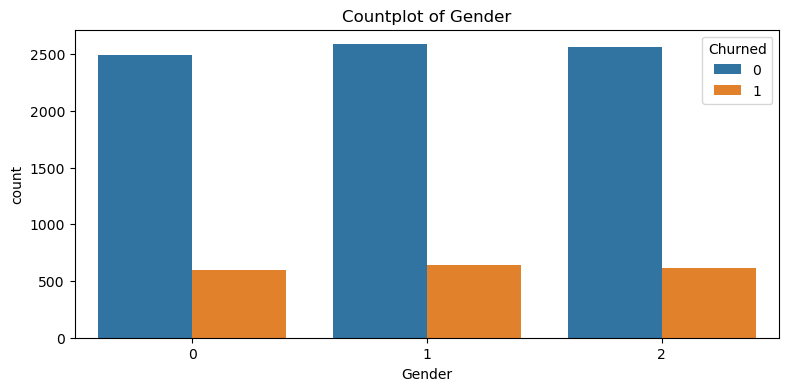

Churned      0    1
Location           
0         1964  478
1         1932  456
2         1882  460
3         1866  462


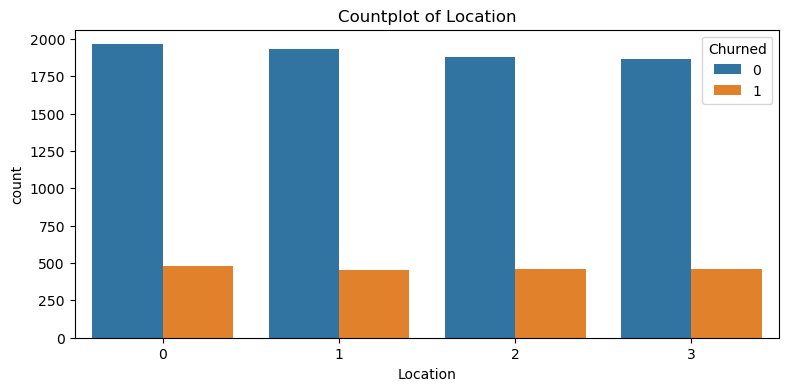

Churned        0    1
Occupation           
0           1975  463
1           1801  467
2           1961  471
3           1907  455


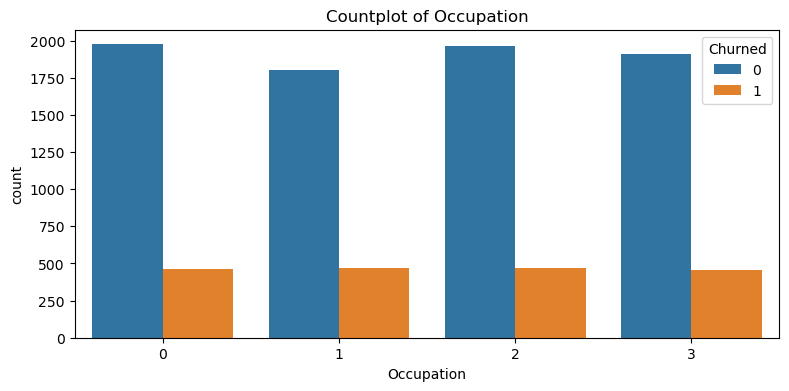

Churned            0    1
Income Bracket           
0               2531  624
1               2511  608
2               2602  624


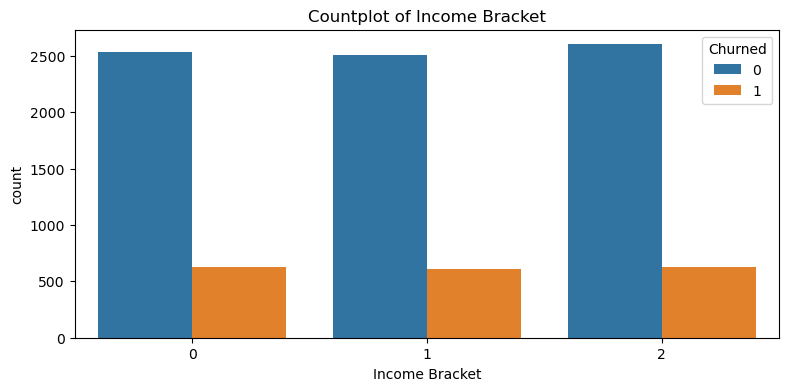

Churned     0    1
Channel           
0        2490  645
1        2594  626
2        2560  585


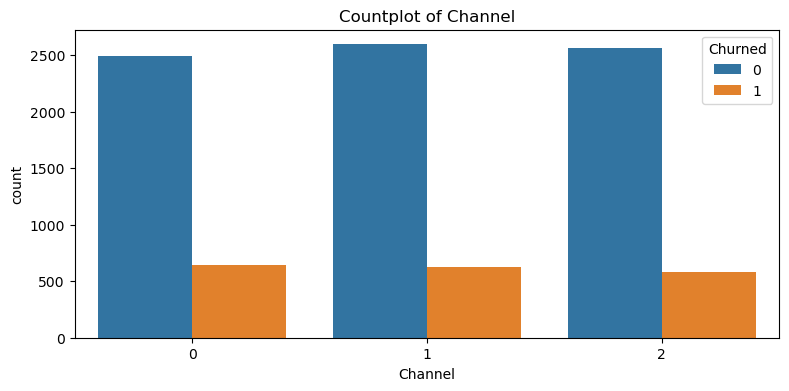

Churned         0    1
Device Type           
0            2573  651
1            2512  609
2            2559  596


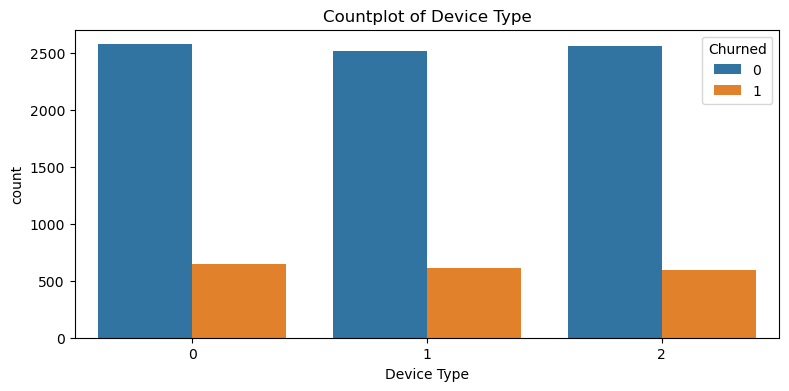

Churned          0    1
Current Plan           
0             1863  462
1             1914  477
2             1945  456
3             1922  461


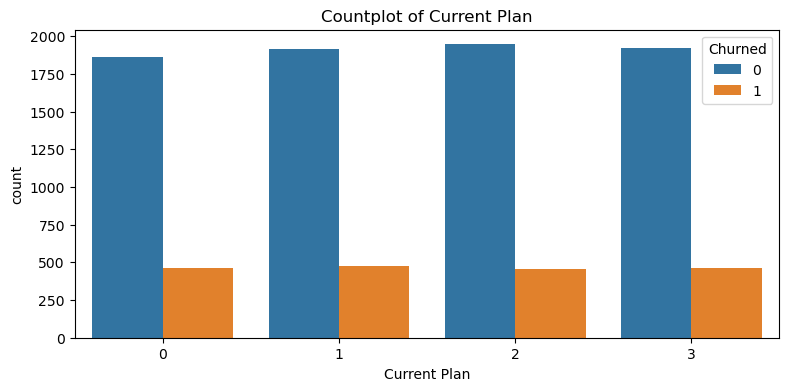

Churned          0    1
Payment Mode           
0             3893  952
1             3751  904


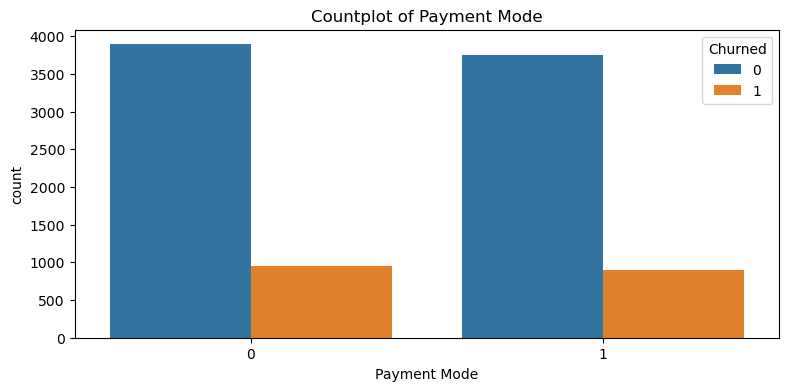

Churned             0    1
Survey Feedback           
0                2586  627
1                2510  599
2                2548  630


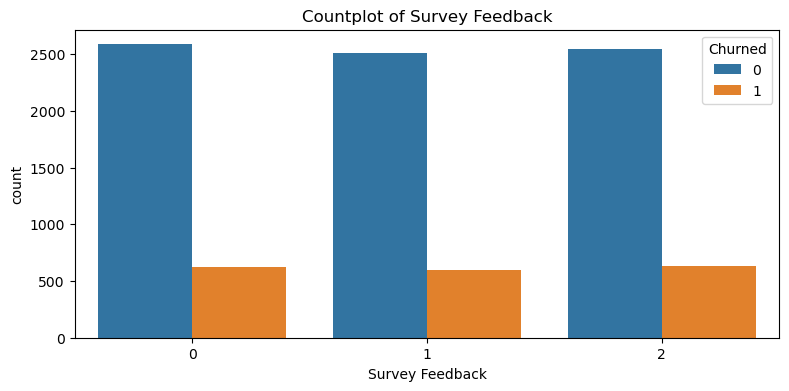

In [23]:
for cat in cat_cols:
    plt.figure(figsize=(20,4))
    plt.subplot(1,2,1)
    print(pd.crosstab(features[cat],target))
    plt.title(f'Countplot of {cat}')
    sns.countplot(x=cat,data=features,hue=target)
    plt.show()

# Make dataset balanced

In [24]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
X_resampled,y_resampled=smote.fit_resample(features,target)

C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

In [25]:
balanced=X_resampled
balanced['Churned']=y_resampled
balanced=pd.DataFrame(balanced)

In [26]:
balanced

,Age,Gender,Location,Occupation,Income Bracket,Credit Score,Channel,Device Type,Loans Accessed,Savings Accessed,...,Tickets Raised,Resolution Time (hrs),Sentiment Score,Survey Feedback,Onboarding Year,Onboarding Month,Customer Tenuer Year,Total Logins,Support Intensity,Churned
0,49,2,3,0,1,792,1,2,0,1,...,4.000000,26.993946,0.570978,0,2019,7,6,32.000000,0.148181,0
1,53,1,3,1,1,356,2,1,3,1,...,0.000000,101.537031,0.832714,1,2011,3,14,7.000000,0.000000,1
2,67,0,1,2,2,441,1,1,1,1,...,2.000000,29.379271,0.442001,0,2017,11,8,20.400753,0.068075,0
3,54,1,2,2,2,708,2,0,0,1,...,1.000000,167.618638,0.264915,2,2017,3,8,17.000000,0.005966,0
4,65,1,2,3,2,377,2,2,0,1,...,0.000000,5.694075,0.253205,1,2011,4,14,22.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15283,35,2,1,3,1,577,1,1,1,1,...,2.525102,72.340644,0.394493,2,2017,10,7,15.525102,0.041509,1
15284,61,0,1,1,0,834,1,0,0,1,...,2.737241,54.731153,0.751620,1,2015,7,9,9.894138,0.097409,1
15285,51,0,0,1,0,775,1,1,2,1,...,1.000000,79.464196,0.303077,0,2011,3,13,11.592579,0.012961,1
15286,59,0,0,2,0,760,1,0,1,1,...,2.000000,85.810245,0.625812,0,2014,6,10,12.755666,0.023533,1


Text(0.5, 1.0, 'Balanced data')

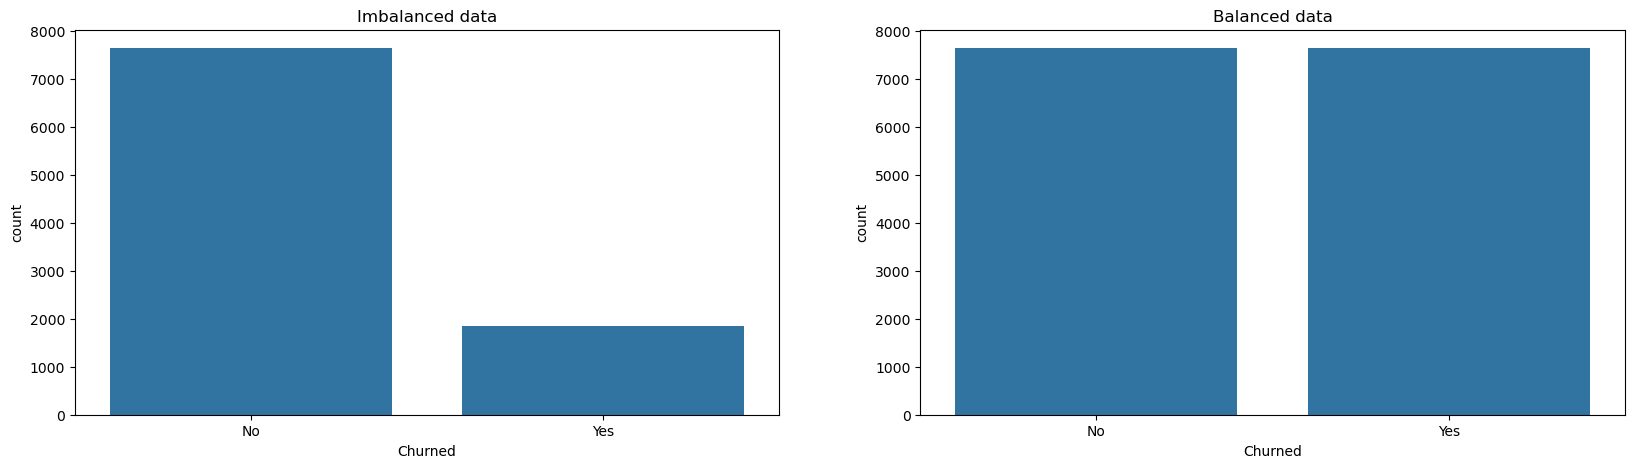

In [27]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(x=target,data=fe)
fe['Churned'].value_counts()
plt.xticks([0,1],['No','Yes'])
plt.title('Imbalanced data')

plt.subplot(1,2,2)
sns.countplot(x='Churned',data=balanced)
balanced['Churned'].value_counts()
plt.xticks([0,1],['No','Yes'])
plt.title('Balanced data')

Model Building
- LogisticRegression
- RandomeForestClassifier
- XGBClassifier
- LGBMClassifier
- CatBoostClassifier

In [28]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score,  precision_score, recall_score, confusion_matrix, classification_report
import joblib

In [29]:
X=balanced.drop(columns=['Churned'])
y=balanced['Churned']

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## Model Training

In [31]:
models={
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomeForestClassifier":RandomForestClassifier(),
    "XGBClassifier":XGBClassifier(),
    "LGBMClassifier":LGBMClassifier(),
    "CatBoostClassifier":CatBoostClassifier(verbose=0),
}

In [32]:
results = []
for name, model in models.items():
    print(f"Training {name}......")
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] 
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'F1 Score': f1,
        'ROC AUC': auc
    })
    
    joblib.dump(model, f"{name}.pkl")
    print(f"{name} model saved")

print("Training Completed.")
result_df = pd.DataFrame(results)


Training LogisticRegression......


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression model saved
Training RandomeForestClassifier......
RandomeForestClassifier model saved
Training XGBClassifier......
XGBClassifier model saved
Training LGBMClassifier......
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 6085, number of negative: 6145
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001242 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1939
[LightGBM] [Info] Number of data points in the train set: 12230, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497547 -> initscore=-0.009812
[LightGBM] [Info] Start training from score -0.009812
LGBMClassifier model saved
Training CatBoostClassifier......
CatBoostClassifier model saved
Training Completed.


In [33]:
result_df

,Model,Accuracy,F1 Score,ROC AUC
0,LogisticRegression,0.856115,0.857050,0.934899
1,RandomeForestClassifier,0.917593,0.918075,0.976804
2,XGBClassifier,0.926422,0.927161,0.980127
3,LGBMClassifier,0.929039,0.929201,0.978998
4,CatBoostClassifier,0.929366,0.929366,0.978654


C:\Users\tanma\AppData\Local\Temp\ipykernel_20784\2042945922.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Model",x="Accuracy", data=result_df,palette='rocket')


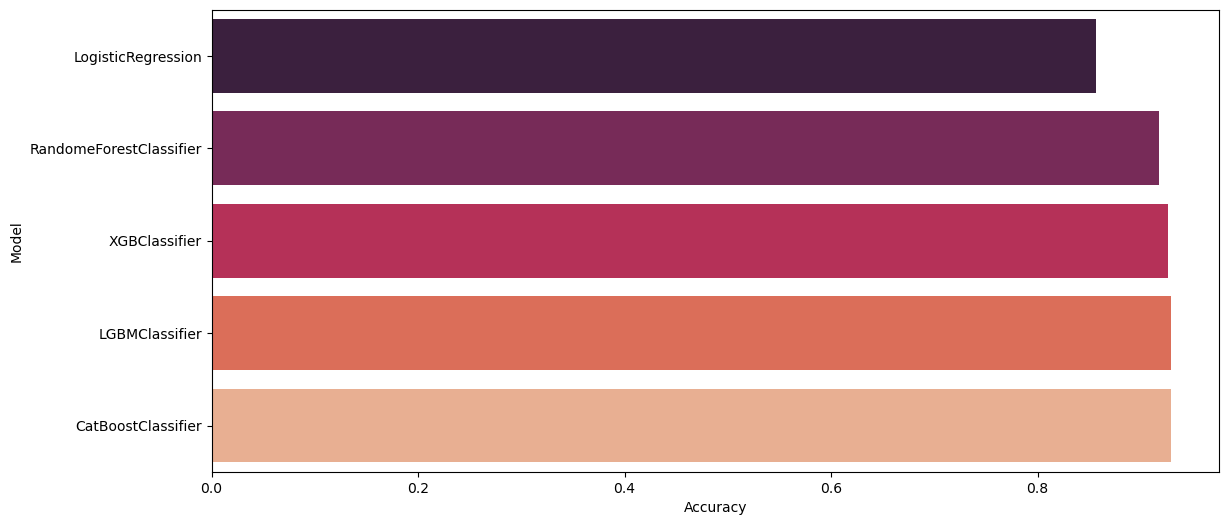

In [34]:
plt.figure(figsize=(13,6))
sns.barplot(y="Model",x="Accuracy", data=result_df,palette='rocket')
plt.show()

# Model Interpretability
selected the key features based on SHAP analysis
"Total Logins", "Tickets Raised", "Customer Tenure Year", "Sentiment Score", "Onboarding Year", "Loans Accessed", "Loans Taken", "Monthly Avg Balance"

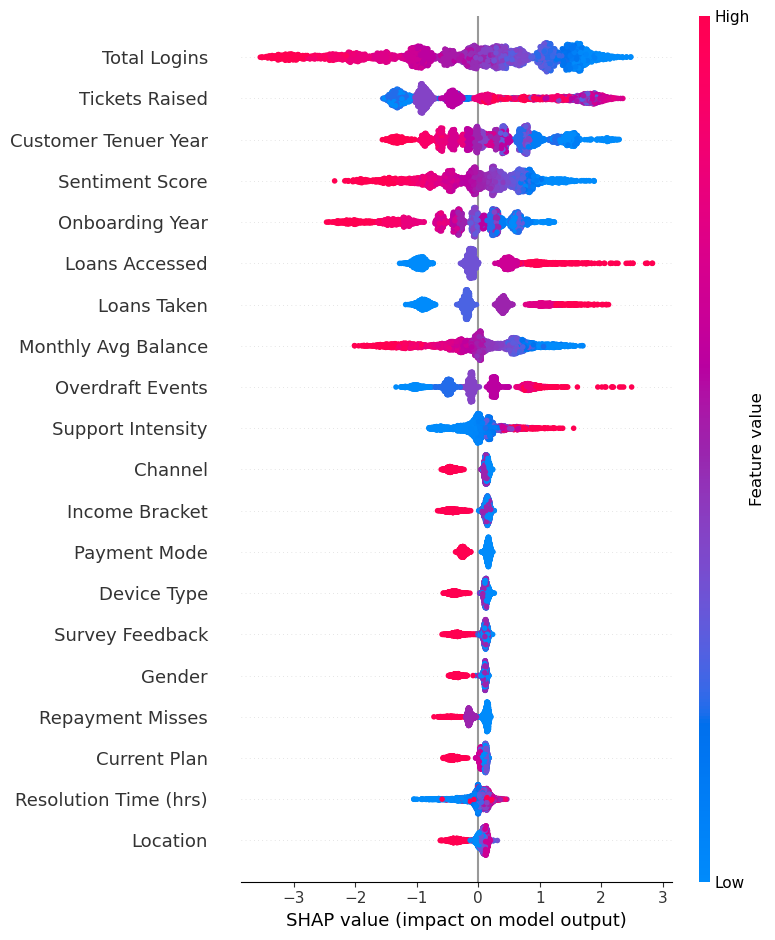

In [35]:
import joblib
import shap
cat_model = joblib.load("CatBoostClassifier.pkl")

explainer = shap.TreeExplainer(cat_model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)
shap.initjs()
shap.force_plot(
    explainer.expected_value, 
    shap_values[0, :], 
    X_test.iloc[0, :]
)

In [36]:
balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15288 entries, 0 to 15287
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    15288 non-null  int64  
 1   Gender                 15288 non-null  int32  
 2   Location               15288 non-null  int32  
 3   Occupation             15288 non-null  int32  
 4   Income Bracket         15288 non-null  int32  
 5   Credit Score           15288 non-null  int64  
 6   Channel                15288 non-null  int32  
 7   Device Type            15288 non-null  int32  
 8   Loans Accessed         15288 non-null  int64  
 9   Savings Accessed       15288 non-null  int64  
 10  Monthly Avg Balance    15288 non-null  float64
 11  Loans Taken            15288 non-null  int64  
 12  Repayment Misses       15288 non-null  int64  
 13  Overdraft Events       15288 non-null  int64  
 14  Failed Payments        15288 non-null  int64  
 15  Cu

In [37]:
selected=balanced.copy()

In [38]:
selected=selected[["Total Logins","Tickets Raised", "Customer Tenuer Year", "Sentiment Score", "Onboarding Year", "Loans Accessed", "Loans Taken", "Monthly Avg Balance","Churned"]]

In [39]:
selected.to_csv("Selected_features.csv")

C:\Users\tanma\AppData\Roaming\Python\Python312\site-packages\shap\explainers\_tree.py:583: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


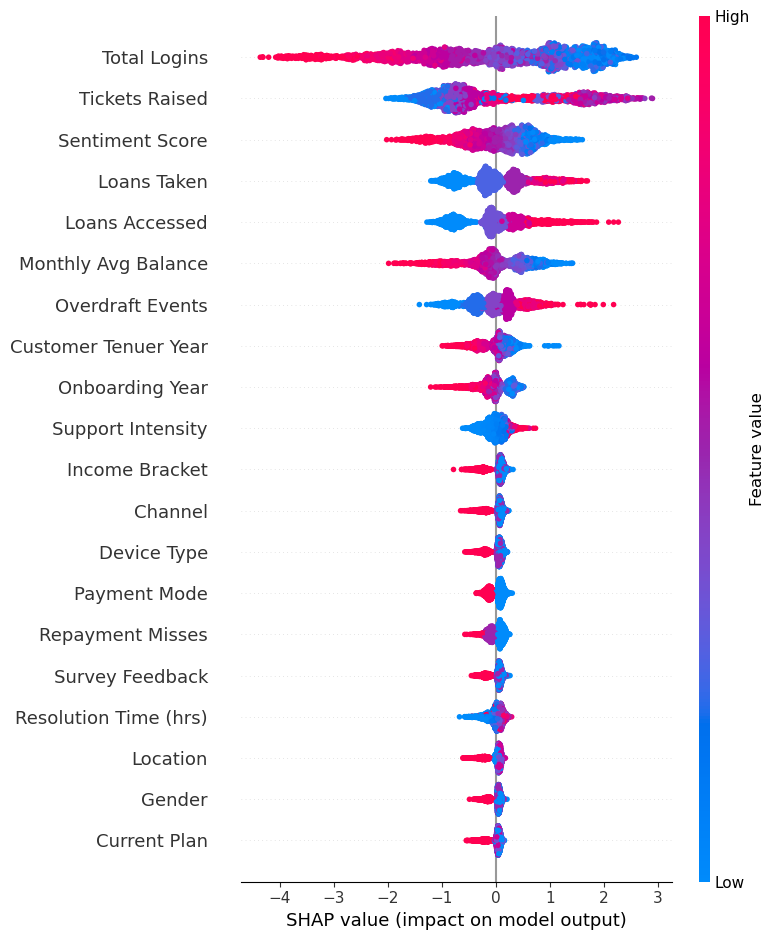